## Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

from skimage.color import rgb2hsv, hsv2rgb

import scipy.signal

### любая на выбор цветовая обработка

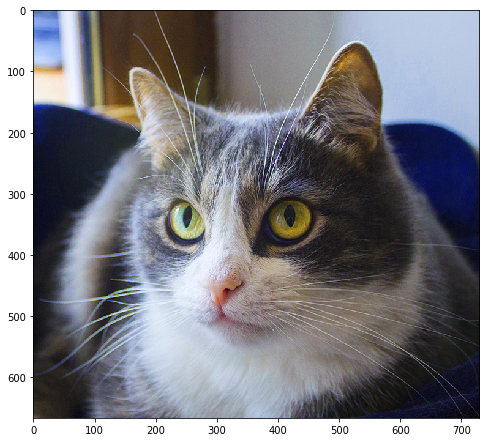

In [22]:
# загрузка изображения
img = imageio.imread('cat-color.png')
img = img.astype(np.float32) / 255.
plt.figure(figsize=(8, 8))
plt.imshow(img)

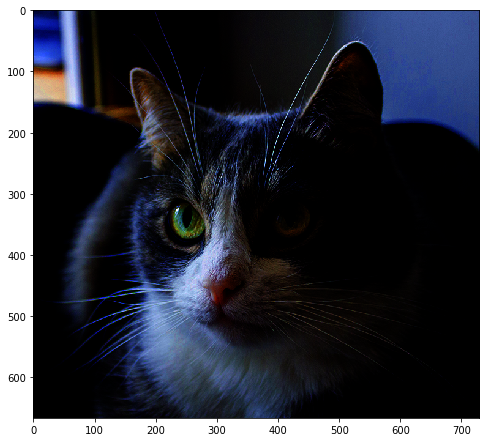

In [26]:
# увеличение яркости
plt.figure(figsize=(8, 8))
plt.imshow(img**5) 

### перевод в другое цветовое пространство

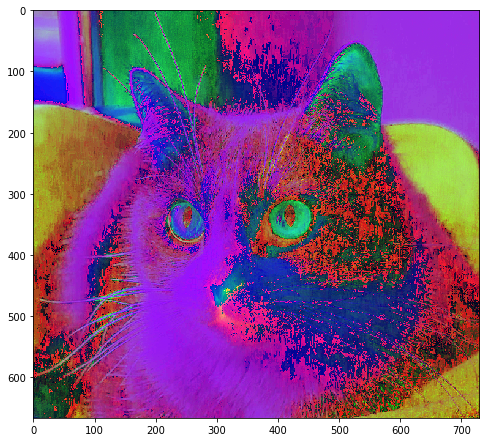

In [28]:
# rgb -> hsv
img_hsv = rgb2hsv(img)
plt.figure(figsize=(8, 8))

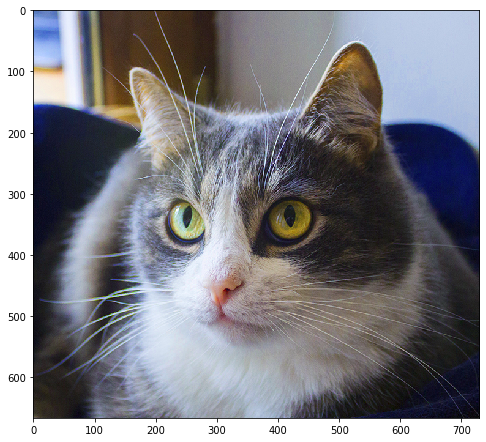

In [29]:
# hsv -> rgb, должно получиться исходное изображение
img_rgb = hsv2rgb(img_hsv)
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)

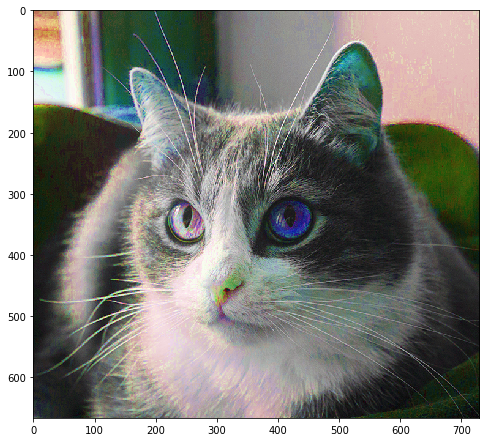

In [36]:
# изменение тона
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] *= 5
img_new = hsv2rgb(img_hsv_new)

plt.figure(figsize=(8, 8))
plt.imshow(img_new)

### фильтрация

In [43]:
# Box blur
if 0:
    win_size = (11, 11)
    w = np.ones(win_size, dtype=np.float32)
    w = w / np.sum(w)

# Gaussian blur
if 1:
    win_size = (11, 11)
    sigma = 3
    w = np.zeros(win_size, dtype=np.float32)
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                            -(j-w.shape[1]//2)**2 / sigma**2 / 2)
    w = w / np.sum(w)

Wall time: 838 ms


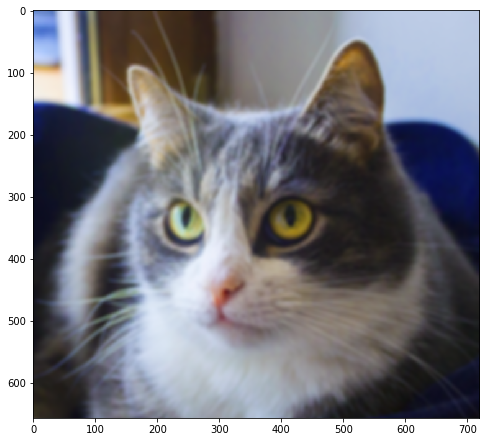

In [44]:
%%time

out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

plt.figure(figsize=(8, 8))
plt.imshow(out_img)